# 0. Downloading Kaggle dataset

### Install Kaggle Command

In [ ]:
# bash command
!pip install kaggle

### Download dataset using kaggle via bash

In [1]:
!kaggle datasets download -d blastchar/telco-customer-churn

100%|█████████████████████████████████████████| 172k/172k [00:00<00:00, 486kB/s]



In [2]:
!unzip telco-customer-churn.zip

Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


# 0. Start from here

### Import library necessary for EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

### Read data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1. Perform Exploratory Data Analysis (EDA) on the given dataset

### Check if there are any missing value

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

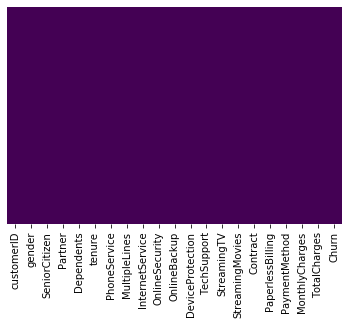

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<font size="5">
<span style="color:green">
<b>IMPORTANT FINDING:</b> From the chart above => No missing value => No imputation is required
</span>
</font>

### General data check

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


<font size=5>
<span style="color:red">
<b>NEED TO TAKE NOTE:</b>
Total Charges suppose to be float64 data type but is currently a string (because of the above cases).
</span>
</font>

<font size=3>
<span style="color:blue">
As such, manual imputation need to be carry out (assumption: total charges = monthly charge + additional charges => should be able to safely impute those missing total charges as monthly charges at least) and then subsequently convert it to float64. In addition, these 11 cases are also negative churn with may also further suggest to be safe to do so (if our assumption is that higher the total charges, the higher the chance of user dropping out of business).
</span>
</font>

In [8]:
df.loc[df['TotalCharges']==' ', 'TotalCharges'] = df['MonthlyCharges']
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

<div class="alert-success">
<b>PROCESS COMPLETED:</b> Total charges are successfully imputed and converted to float64 datatype. Dataset should be good for some basic visualisation
</div>

### Find unique values for columns that are non-numerical

In [10]:
non_num_col_list = list(df.dtypes[df.dtypes=='object'].index)
print(non_num_col_list)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [11]:
non_num_col_list.remove('customerID')
print(non_num_col_list)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [12]:
for col in non_num_col_list:
    print(col)
    print(df[col].unique())
    print('\n')

gender
['Female' 'Male']


Partner
['Yes' 'No']


Dependents
['No' 'Yes']


PhoneService
['No' 'Yes']


MultipleLines
['No phone service' 'No' 'Yes']


InternetService
['DSL' 'Fiber optic' 'No']


OnlineSecurity
['No' 'Yes' 'No internet service']


OnlineBackup
['Yes' 'No' 'No internet service']


DeviceProtection
['No' 'Yes' 'No internet service']


TechSupport
['No' 'Yes' 'No internet service']


StreamingTV
['No' 'Yes' 'No internet service']


StreamingMovies
['No' 'Yes' 'No internet service']


Contract
['Month-to-month' 'One year' 'Two year']


PaperlessBilling
['Yes' 'No']


PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Churn
['No' 'Yes']




<div class="alert-info">
<b>FOR INFO:</b> Seems like dataset is quite clean. The options in each non-numerical columns are standardised nicely and don't really need much intervention
<div>

### Visualisation of the data

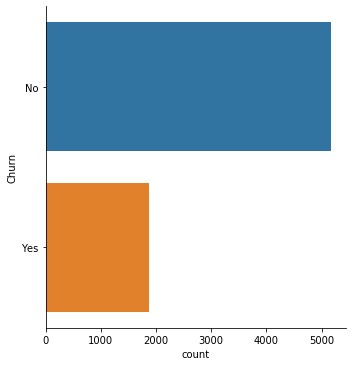

In [13]:
sns.catplot(data=df, y='Churn', kind='count')

In [14]:
print('Churn Percentage Distribution')
df[['customerID', 'Churn']].groupby('Churn').count() / df['customerID'].count() * 100

Churn Percentage Distribution


,customerID
Churn,
No,73.463013
Yes,26.536987


<div class="alert-success">
    <b>IMPORTANT FINDING:</b> Churn are not inbalance. Artifical sampling or SMOTE may not be needed.
</div>

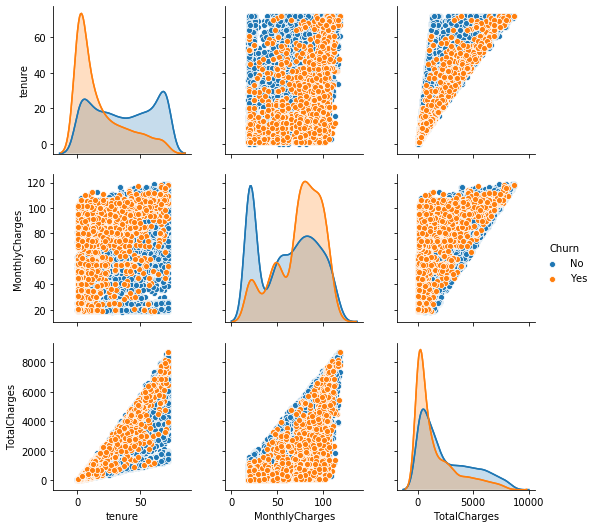

In [15]:
# remove away Senior Citizen Since it is Categorical
g = sns.pairplot(data=df.drop('SeniorCitizen', axis= 1), hue='Churn')
g.map_diag(sns.kdeplot)

<div class="alert-info">
<b>FOR INFO:</b> Seems like users who dropped out tend to have shorter tenure or higher monthly charges
<div>

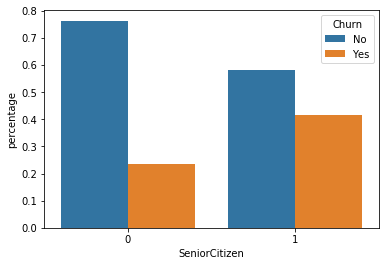

In [16]:
prop_df = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).rename('percentage').reset_index()
sns.barplot(x='SeniorCitizen', y="percentage", hue='Churn', data=prop_df)

In [17]:
len(non_num_col_list)

16

In [18]:
non_num_col_list.remove('Churn')

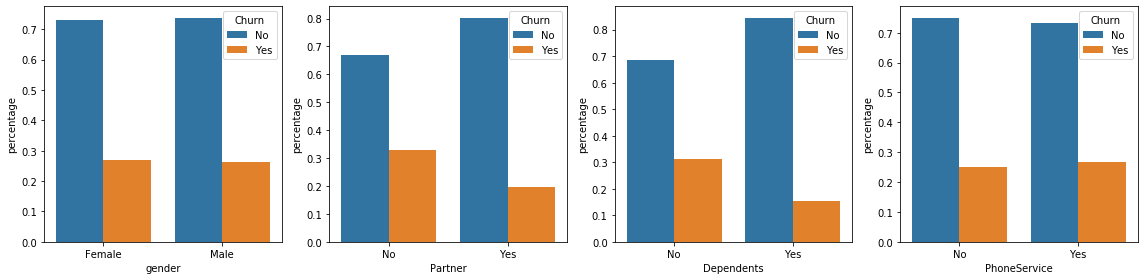

In [19]:
fig, ax = plt.subplots(1,4, figsize=(16,4))

i=0
for col in non_num_col_list[0:4]:
    prop_df = df.groupby([col])['Churn'].value_counts(normalize=True).rename('percentage').reset_index()
    sns.barplot(x=col, y="percentage", hue='Churn', data=prop_df, ax=ax[i])
    i += 1

plt.tight_layout()

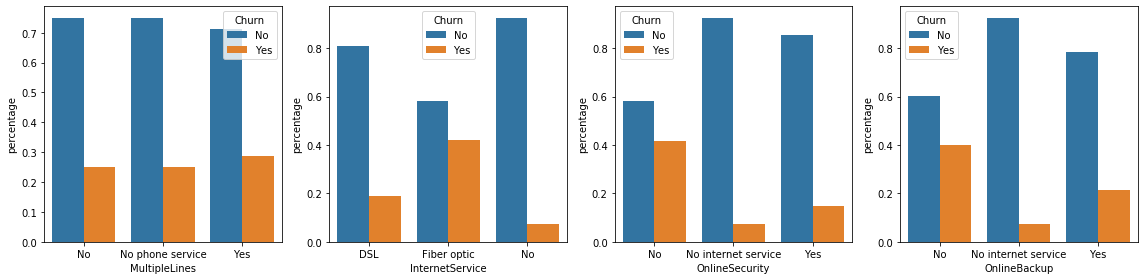

In [20]:
fig, ax = plt.subplots(1,4, figsize=(16,4))

i=0
for col in non_num_col_list[4:8]:
    prop_df = df.groupby([col])['Churn'].value_counts(normalize=True).rename('percentage').reset_index()
    sns.barplot(x=col, y="percentage", hue='Churn', data=prop_df, ax=ax[i])
    i += 1

plt.tight_layout()

<div class="alert-info">
<b>FOR INFO:</b> The 2nd chart seems to suggest that someone that is using fiber optic internet service is more likely to stop using the telco service.
    
Similarly, 3rd and 4th chart also seem to also suggest that someone that has no online security or no online backup is also more likely to stop using the telco service.
<div>

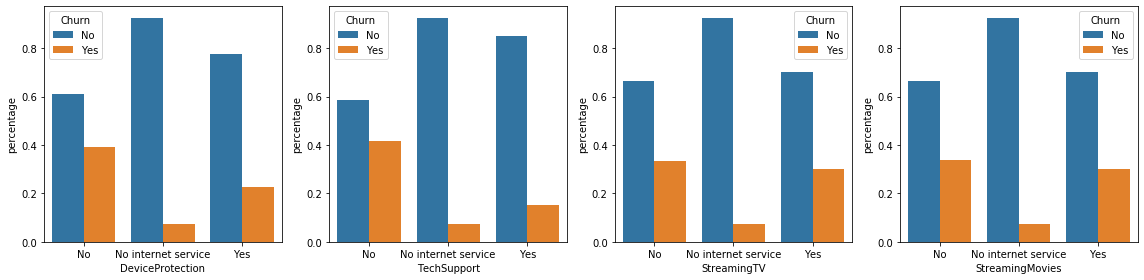

In [21]:
fig, ax = plt.subplots(1,4, figsize=(16,4))

i=0
for col in non_num_col_list[8:12]:
    prop_df = df.groupby([col])['Churn'].value_counts(normalize=True).rename('percentage').reset_index()
    sns.barplot(x=col, y="percentage", hue='Churn', data=prop_df, ax=ax[i])
    i += 1

plt.tight_layout()

<div class="alert-info">
<b>FOR INFO:</b> Similarly, 1st and 2nd chart also seem to also suggest that someone that has no device protection or no tech support is also more likely to stop using the telco service.
<div>

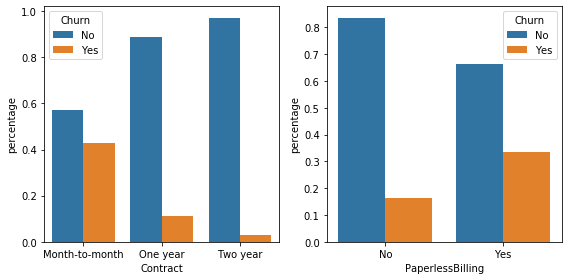

In [22]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

i=0
for col in non_num_col_list[12:14]:
    prop_df = df.groupby([col])['Churn'].value_counts(normalize=True).rename('percentage').reset_index()
    sns.barplot(x=col, y="percentage", hue='Churn', data=prop_df, ax=ax[i])
    i += 1

plt.tight_layout()

<div class="alert-info">
<b>FOR INFO:</b> 1st chart also seem to also suggest that someone with a month-to-month version of contract is also more likely to stop using the telco service.
<br/>
This is also inline with the observation made at the pairplot where someone who is more likely to stop using the telco service has a shorter tenure.
<div>

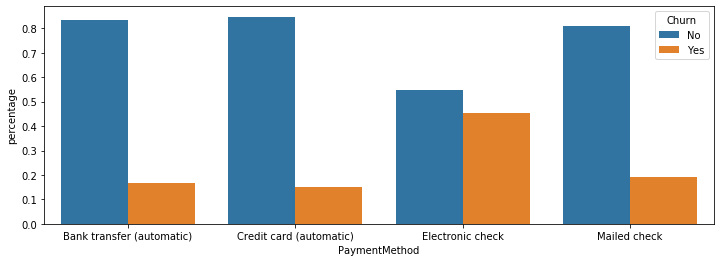

In [23]:
plt.figure(figsize=(12,4))
prop_df = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).rename('percentage').reset_index()
sns.barplot(x='PaymentMethod', y="percentage", hue='Churn', data=prop_df)

<div class="alert-success">
<b>IMPORTANT FINDING:</b>
<br/>
<b>HYPOTHESIS:</b> Below features have some form of correlation with churn = Yes.
<br/>
1) Shorter tenure
<br/>
2) Higher monthly charges
<br/>
3) Using fiber optic as their internet service
<br/>
4) No online security 
<br/>
5) No online backup
<br/>
6) No device protection
<br/>
7) No tech support
<br/>
8) Month-to-month contract
</div>

### Converting the labels of non-numerical columns to One-Hot-Encoding (i.e. create binary variables to classify each labels)

In [24]:
df_input = pd.get_dummies(data=df.drop('customerID', axis=1), drop_first=True)

In [25]:
print(df_input.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')


### Removing variables that are highly correlated that might cause multicollinearity (which might be difficult for algorithm to find solution)
We make use of Variance Inflation Factor (VIF) and remove features with VIF value greater than 10 (rule of thumb)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
pearson_corr = pd.DataFrame(df_input.corr(method='pearson'))['Churn_Yes']
spearman_corr = pd.DataFrame(df_input.corr(method='spearman'))['Churn_Yes']
corr_table = pd.concat([pearson_corr, spearman_corr], axis=1)
corr_table.columns = ['Pearson Correlation', 'Spearman Correlation']
print('Original Correlation to Churn_Yes')
corr_table

Original Correlation to Churn_Yes


,Pearson Correlation,Spearman Correlation
SeniorCitizen,0.150889,0.150889
tenure,-0.352229,-0.367062
MonthlyCharges,0.193356,0.184743
TotalCharges,-0.198347,-0.230181
gender_Male,-0.008612,-0.008612
Partner_Yes,-0.150448,-0.150448
Dependents_Yes,-0.164221,-0.164221
PhoneService_Yes,0.011942,0.011942
MultipleLines_No phone service,-0.011942,-0.011942
MultipleLines_Yes,0.040102,0.040102


In [28]:
def calc_vif(X):
    """
    Credit to https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/
    """
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [29]:
vif_df = calc_vif(df_input.drop('Churn_Yes', axis=1, inplace=False))

//anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [30]:
vif_df[vif_df['VIF'] >= 10]

,variables,VIF
2,MonthlyCharges,865.062005
3,TotalCharges,10.793380
7,PhoneService_Yes,1770.643145
8,MultipleLines_No phone service,60.867297
10,InternetService_Fiber optic,148.263379
11,InternetService_No,inf
12,OnlineSecurity_No internet service,inf
14,OnlineBackup_No internet service,inf
16,DeviceProtection_No internet service,inf
18,TechSupport_No internet service,inf


In [31]:
# manual drop of variables

var_to_drop = ['OnlineSecurity_No internet service',
               'OnlineBackup_No internet service',
               'DeviceProtection_No internet service',
               'TechSupport_No internet service',
               'StreamingTV_No internet service',
               'StreamingMovies_No internet service'
              ]
df_input.drop(labels=var_to_drop, axis=1, inplace=True)

In [32]:
vif_df = calc_vif(df_input.drop('Churn_Yes', axis=1, inplace=False))
vif_df[vif_df['VIF'] >= 10]

,variables,VIF
2,MonthlyCharges,865.062005
3,TotalCharges,10.793380
7,PhoneService_Yes,1770.643145
8,MultipleLines_No phone service,60.867297
10,InternetService_Fiber optic,148.263379
11,InternetService_No,104.217468
16,StreamingTV_Yes,24.056840
17,StreamingMovies_Yes,24.110245


In [33]:
# loop to remove VIF greater than 10
while vif_df[vif_df['VIF'] >= 10]['variables'].count() > 0:
    temp_var_drop_list = list(vif_df[vif_df['VIF'] == max(vif_df['VIF'])]['variables'])
    df_input.drop(temp_var_drop_list, axis=1, inplace=True)
    vif_df = calc_vif(df_input.drop('Churn_Yes', axis=1))

In [34]:
vif_df = calc_vif(df_input)
vif_df.set_index('variables', inplace=True)

In [35]:
vif_df

,VIF
variables,
SeniorCitizen,1.373574
tenure,7.646396
gender_Male,1.904274
Partner_Yes,2.814290
Dependents_Yes,1.956248
MultipleLines_No phone service,1.393317
MultipleLines_Yes,2.445851
InternetService_Fiber optic,3.333981
InternetService_No,2.614045


In [36]:
pearson_corr = pd.DataFrame(df_input.corr(method='pearson'))['Churn_Yes']
spearman_corr = pd.DataFrame(df_input.corr(method='spearman'))['Churn_Yes']
corr_table_final = pd.concat([vif_df, pearson_corr, spearman_corr], axis=1, )
corr_table_final.columns = ['VIF','Pearson Correlation', 'Spearman Correlation']
print('Final Correlation to Churn_Yes')
corr_table_final

Final Correlation to Churn_Yes


,VIF,Pearson Correlation,Spearman Correlation
variables,,,
SeniorCitizen,1.373574,0.150889,0.150889
tenure,7.646396,-0.352229,-0.367062
gender_Male,1.904274,-0.008612,-0.008612
Partner_Yes,2.814290,-0.150448,-0.150448
Dependents_Yes,1.956248,-0.164221,-0.164221
MultipleLines_No phone service,1.393317,-0.011942,-0.011942
MultipleLines_Yes,2.445851,0.040102,0.040102
InternetService_Fiber optic,3.333981,0.308020,0.308020
InternetService_No,2.614045,-0.227890,-0.227890


<div class="alert-info">
<b>FOR INFO:</b> Although we drop out monthly charge because of its high VIF, its correlation coefficient with Churn doesn't seem to be as great as tenure or contract length
<div>

<div class="alert-success">
    <b>IMPORTANT FINDING:</b> Above variables are then chosen for modelling
</div>

### Quick visualisation of the Correlation Plot via heatmap also suggest that we have remove most of the columns that tend to have some form of multicollinearity behaviours with other columns

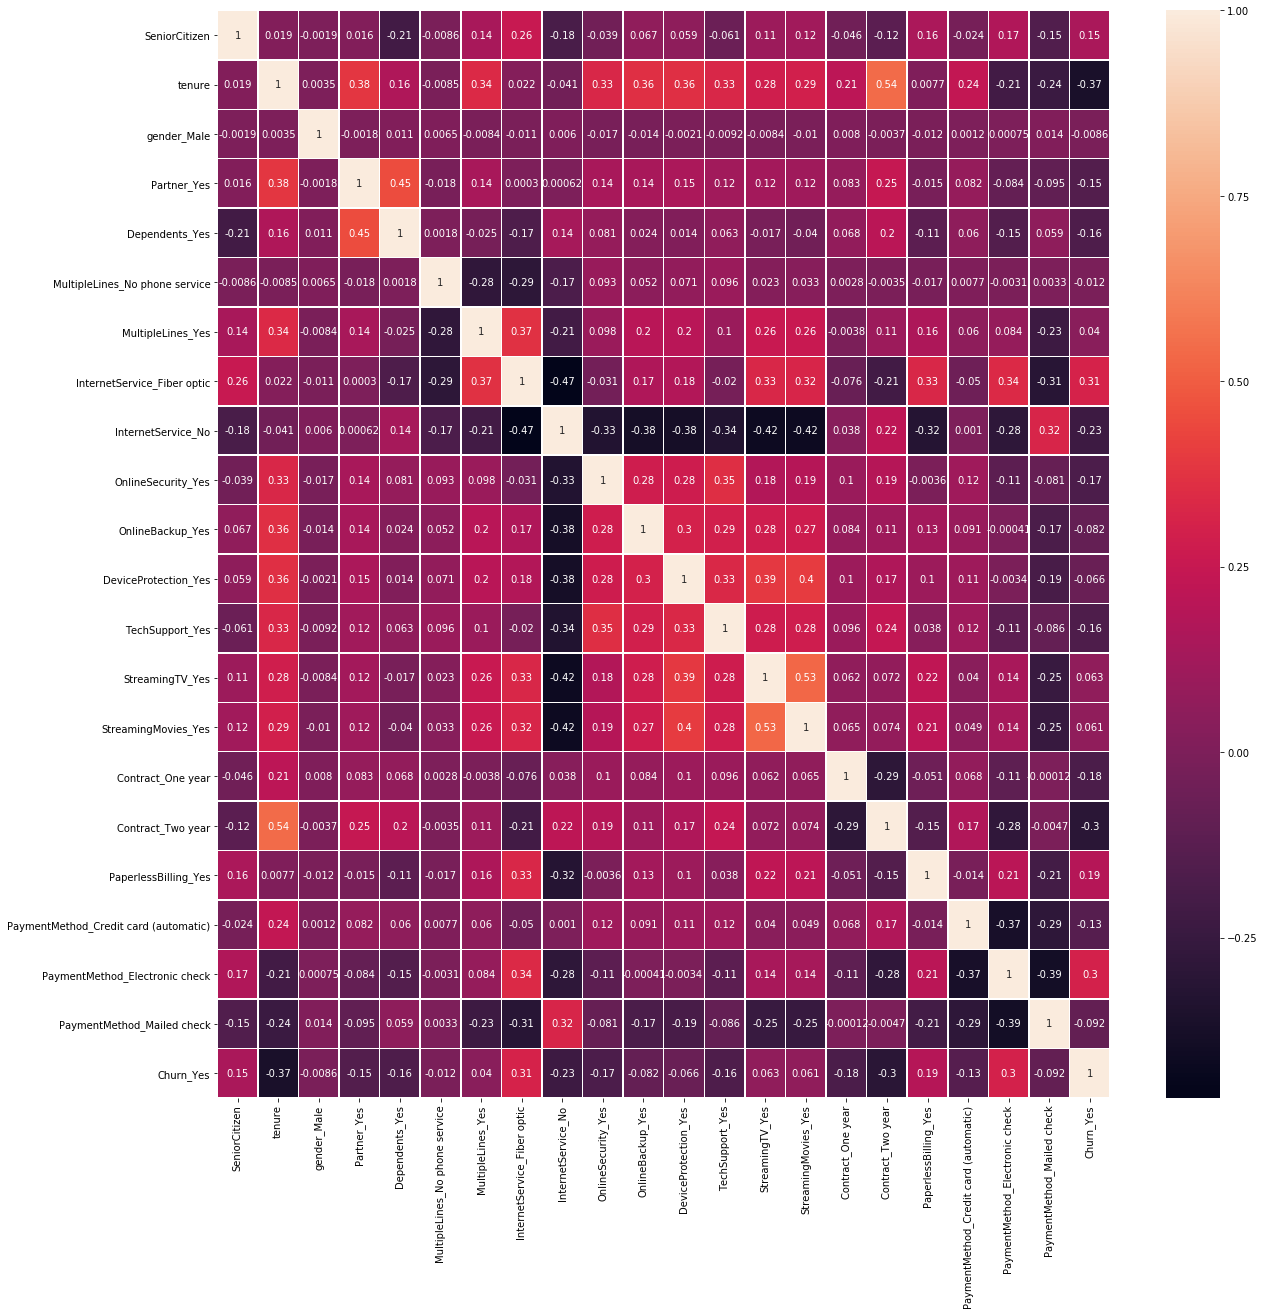

In [37]:
plt.figure(figsize = (20,20))
sns.heatmap(df_input.corr(method='spearman'), annot=True, linewidths=.5)

# 2. Build customer churn prediction model

### Import key libraries for modelling

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix

import xgboost as xgb

In [39]:
X = df_input.drop('Churn_Yes', axis = 1)
y = df_input['Churn_Yes']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
def class_metric(y_score, y_pred, model):
    """
    Function to help print out key metrics and save into a dataframe for future uses
    """
    tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    precision = tp/(tp+fp)
    TPR = tp/(tp+fn)
    FPR = fp/(tn+fp)
    f1_score = 0.5 * (precision * TPR) / (precision + TPR)
    AUC_score = roc_auc_score(y_true = y_test, y_score = y_score)
    print('Performance Summary of {}'.format(model))
    print('Confusion Matrix (tn, fp, fn, tp in order from left to right, then down):\n')
    print(confusion_matrix(y_true = y_test, y_pred = y_pred))
    print('\n')
    print('Accuracy is {}'.format(round(accuracy,3)))
    print('Precision is {}'.format(round(precision,3)))
    print('Recall or True Positive Rate is {}'.format(round(TPR,3)))
    print('False Positive Rate is {}'.format(round(FPR,3)))
    print('F1 score is {}'.format(round(f1_score, 3)))
    print('ROC AUC score is {}'.format(round(AUC_score,3)))
    metric_dict = {'model' : [model],
                   'roc auc score' : [round(AUC_score,3)],
                   'accuracy' : [round(accuracy,3)],
                   'precision' : [round(precision,3)],
                   'true positive rate' : [round(TPR,3)],
                   'false positive rate' : [round(FPR,3)],
                   'f1 score': [round(f1_score, 3)]
                  }
    metric_df = pd.DataFrame(metric_dict)
    return metric_df

### Training of Logistic Regression

In [85]:
logmodel = LogisticRegression(solver='newton-cg', penalty='none', fit_intercept=True)
logmodel.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
logmodel_metric = class_metric(
    y_score = pd.DataFrame(logmodel.predict_proba(X_test))[1],
    y_pred = logmodel.predict(X_test),
    model = 'logistic regression without tuning'
)

Performance Summary of logistic regression without tuning
Confusion Matrix (tn, fp, fn, tp in order from left to right, then down):

[[939  97]
 [155 218]]


Accuracy is 0.821
Precision is 0.692
Recall or True Positive Rate is 0.584
False Positive Rate is 0.094
F1 score is 0.158
ROC AUC score is 0.861


### Training of Random Forest

In [55]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
rfc_metric = class_metric(
    y_score = pd.DataFrame(rfc.predict_proba(X_test))[1],
    y_pred = rfc.predict(X_test),
    model = 'random forest without tuning'
)

Performance Summary of random forest without tuning
Confusion Matrix (tn, fp, fn, tp in order from left to right, then down):

[[942  94]
 [198 175]]


Accuracy is 0.793
Precision is 0.651
Recall or True Positive Rate is 0.469
False Positive Rate is 0.091
F1 score is 0.136
ROC AUC score is 0.832


### Training of XGboost 

In [57]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [58]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 2} 

steps = 20  # The number of training iterations

In [59]:
xgb_model = xgb.train(param, D_train, steps)

In [60]:
y_pred_prob = xgb_model.predict(D_test)
xgb_y_pred = np.asarray([np.argmax(line) for line in y_pred_prob])

In [61]:
xgb_metric = class_metric(
    y_score = pd.DataFrame(y_pred_prob)[1],
    y_pred = xgb_y_pred,
    model = 'xgboost without tuning'
)

Performance Summary of xgboost without tuning
Confusion Matrix (tn, fp, fn, tp in order from left to right, then down):

[[938  98]
 [165 208]]


Accuracy is 0.813
Precision is 0.68
Recall or True Positive Rate is 0.558
False Positive Rate is 0.095
F1 score is 0.153
ROC AUC score is 0.863


### Suppose we go with xgboost (reason being usually xgboost is able to improve on AUC quite significantly), carry out hyper parameter tuning

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

clf = xgb.XGBClassifier()

param_grid = {
        'max_depth': np.arange(3,11,1),
        'min_child_weight': np.arange(0,1.05,0.05),
        'gamma': np.arange(0,41,1),
        'learning_rate': np.arange(0,0.55,0.05),
        'subsample': np.arange(0,1.05,0.05),
        'colsample_bylevel': np.arange(0,1.05,0.05),
        'colsample_bytree': np.arange(0,1.05,0.05),
        'n_estimators' : [100, 200, 300, 400, 500]
}

##kfold = KFold(n_splits=10, shuffle=True, random_state=42)
xgb_grid_search = RandomizedSearchCV(clf, param_distributions = param_grid, scoring="roc_auc", n_iter = 1000, cv=3, random_state=42, verbose=2, n_jobs = -1)
xgb_grid_result = xgb_grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  6.6min finished


In [64]:
xgb_tuned_metric = class_metric(
    y_score = pd.DataFrame(xgb_grid_result.predict_proba(X_test))[1],
    y_pred = xgb_grid_result.predict(X_test),
    model = 'xgboost with hyperparameter tuning'
)

Performance Summary of xgboost with hyperparameter tuning
Confusion Matrix (tn, fp, fn, tp in order from left to right, then down):

[[942  94]
 [168 205]]


Accuracy is 0.814
Precision is 0.686
Recall or True Positive Rate is 0.55
False Positive Rate is 0.091
F1 score is 0.153
ROC AUC score is 0.864


<div class="alert-info">
Minor improvement of AUC score
<div>

### Given the AUC improvement is minor when we tried hyperparameter tuning, we can consider to take a look at logistic regression (since logistic regression also offer quite a high AUC score).
### Note that logistic regression is able to offer explanabilty over XGboost without going into explanable AI technique such as shapley value 

In [83]:
from sklearn.model_selection import GridSearchCV
logmodel2 = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none','l1' ,'l2', 'elasticnet']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
fit_intercept=[True, False]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values, fit_intercept=fit_intercept)
##kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
logmodel_grid_search = GridSearchCV(estimator=logmodel2, param_grid=grid, n_jobs=-1, cv=kfold, scoring='roc_auc', error_score=0)
logmodel_grid_result = logmodel_grid_search.fit(X_train, y_train)

In [67]:
logmodel_tuned_metric = class_metric(
    y_score = pd.DataFrame(logmodel_grid_result.predict_proba(X_test))[1],
    y_pred = logmodel_grid_result.predict(X_test),
    model = 'logistic regression with hyperparameter tuning'
)

Performance Summary of logistic regression with hyperparameter tuning
Confusion Matrix (tn, fp, fn, tp in order from left to right, then down):

[[938  98]
 [155 218]]


Accuracy is 0.82
Precision is 0.69
Recall or True Positive Rate is 0.584
False Positive Rate is 0.095
F1 score is 0.158
ROC AUC score is 0.861


In [69]:
#renaming
logmodel_with_tuning = logmodel_grid_search
xgb_with_tuning = xgb_grid_search

In [86]:
model_list = [logmodel, logmodel_with_tuning, rfc, xgb_with_tuning]
result_table = pd.DataFrame()

for model in model_list:
    fpr, tpr, thresh = roc_curve(y_test, pd.DataFrame(model.predict_proba(X_test))[1], drop_intermediate=False)
    auc = roc_auc_score(y_true = y_test, y_score = pd.DataFrame(model.predict_proba(X_test))[1])
    
    result_table = result_table.append({'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)


In [87]:
result_table= pd.concat([result_table,pd.DataFrame( {'Model':['logistic model without tuning', 'logistic model with tuning', 'random forest without tuning', 'XGboost with tuning']})], axis=1)

In [88]:
# Set name of the classifiers as index labels
result_table.set_index('Model', inplace=True)

In [89]:
model_summary = pd.concat([logmodel_metric, logmodel_tuned_metric, rfc_metric, xgb_tuned_metric], axis = 0)
model_summary.set_index('model', inplace=True)

Model Metric Summary


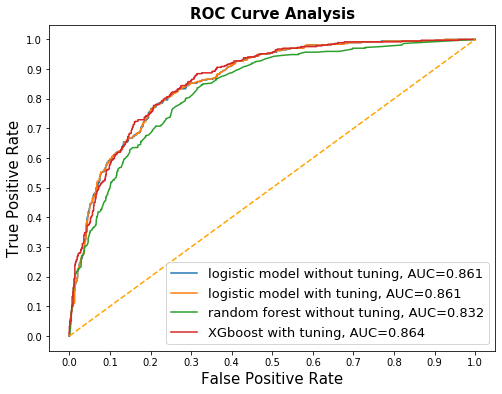

,roc auc score,accuracy,precision,true positive rate,false positive rate,f1 score
model,,,,,,
logistic regression without tuning,0.861,0.821,0.692,0.584,0.094,0.158
logistic regression with hyperparameter tuning,0.861,0.820,0.690,0.584,0.095,0.158
random forest without tuning,0.832,0.793,0.651,0.469,0.091,0.136
xgboost with hyperparameter tuning,0.864,0.814,0.686,0.550,0.091,0.153


In [90]:
fig = plt.figure(figsize=(8,6))

print('Model Metric Summary')
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()
model_summary

<div class="alert-success">
    <b>IMPORTANT FINDING:</b> Although XGboost offer the highest ROC AUC score, we might want to consider logistic regression (or even the original logistic regression without regularisation or tuning) if let say ease of explanability is priortised so that we can explain to the business team (without compromising too much of AUC score at the same time)
    <br/> Neural network are not being consider as the dataset that we are currently examining is too small to let neural network outshine the other algorithm
</div>

### Let us recreate the original logistic model (but via statsmodels instead of sklearn) that we did in the first place to examine the coefficient and its significant

In [91]:
import statsmodels.api as sm

In [93]:
log_reg = sm.Logit(endog=y_train, exog=sm.add_constant(X_train)).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5612
Method:                           MLE   Df Model:                           21
Date:                Tue, 20 Oct 2020   Pseudo R-squ.:                     inf
Time:                        03:56:32   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6946      0.143

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
//anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<div class="alert-success">
<b>IMPORTANT FINDING PART 1:</b>
<br/>
<b>HYPOTHESIS:</b> Below features have some form of correlation with churn = Yes. 
<br/>
Note: A [Yes] beside the variable means that the variable is significant and should be kept in the model whereas the other variable can be dropped.
<br/>
1) Shorter tenure [Y]
<br/>
2) Higher monthly charges [Unable to test, correlated with other key variables]
<br/>
3) Using fiber optic as their internet service [Y]
<br/>
4) No online security [Y]
<br/>
5) No online backup [N]
<br/>
6) No device protection [N]
<br/>
7) No tech support [Y]
<br/>
8) Month-to-month contract [Y]
</div>

<div class="alert-success">
<b>IMPORTANT FINDING PART 2:</b>
<br/>
Based on finding part 1, we can drive into actionable strategy.
<br/>
1) Shorter tenure or month-to-month contract => We need to change our policy such that shorter tenure of contract are less preferred by customers.
<br/>
2) Using fiber optic as their internet service => Bundle fiber optic with other attractive products or promotion to minimise customers with fiber optic from leaving the business.
<br/>
3) No online security or No tech support => Can bundle online security plan or express tech support to minimise customers from leaving the business

# 2. Build customer churn prediction model
## Conclusion: We will go with the logistic model without tuning to carry on with the project

In [95]:
from sklearn.externals import joblib

//anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Saving the model as a pickle file

In [105]:
!mkdir churn_model

In [107]:
joblib.dump(logmodel, './churn_model/model.pkl')
print("Model dumped!")

Model dumped!


In [108]:
model_columns = list(df_input.drop('Churn_Yes', axis = 1).columns)
joblib.dump(model_columns, './churn_model/model_columns.pkl')
print("Models columns dumped!")

Models columns dumped!


### Simple verification of the pickle file and good to use.

In [109]:
test_model = joblib.load('./churn_model/model.pkl')
print ('Model loaded')
test_model_columns = joblib.load("./churn_model/model_columns.pkl")
print ('Model columns loaded')

Model loaded
Model columns loaded


In [110]:
test_model.predict(X_test[test_model_columns])

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

# 3. Deploy the model in Production environment

## b. To complete the deployment, you need to build a simple API to expose the prediction model to other applications within the company. You may use Docker to facilitate the deployment.

### Writing the API

In [114]:
%%writefile ./churn_model/api.py

from flask import Flask, request, jsonify
from sklearn.externals import joblib
import traceback
import pandas as pd
import numpy as np

# Your API definition
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    if logmodel:
        try:
            json_ = request.json
            print(json_)
            query = pd.get_dummies(pd.DataFrame(json_))
            query.loc[df['TotalCharges']==' ', 'TotalCharges'] = df['MonthlyCharges']
            query['TotalCharges'] = df['TotalCharges'].astype('float64')
            query = query.reindex(columns=model_columns, fill_value=0)

            prediction = list(lr.predict(query))

            return jsonify({'prediction': str(prediction)})

        except:

            return jsonify({'trace': traceback.format_exc()})
    else:
        print ('Rerun the jupyter notebook to train the model first')
        return ('No model here to use')

if __name__ == '__main__':
    try:
        port = int(sys.argv[1]) # This is for a command-line input
    except:
        port = 12345 # If you don't provide any port the port will be set to 12345

    logmodel = joblib.load("model.pkl") # Load "model.pkl"
    print ('Model loaded')
    model_columns = joblib.load("model_columns.pkl") # Load "model_columns.pkl"
    print ('Model columns loaded')

    app.run(port=port, debug=True)

Overwriting ./churn_model/api.py


In [113]:
%%writefile ./churn_model/__init__.py



Writing ./churn_model/__init__.py


In [115]:
%%writefile ./churn_model/test_case.json
{
"customerID": "7590-VHVEG",
"gender": "Female",
"SeniorCitizen": 0,
"Partner": "Yes",
"Dependents": "No",
"tenure": 1,
"PhoneService": "No",
"MultipleLines": "No phone service",
"InternetService": "DSL",
"OnlineSecurity": "No",
"OnlineBackup": "Yes",
"DeviceProtection": "No",
"TechSupport": "No",
"StreamingTV": "No",
"StreamingMovies": "No",
"Contract": "Month-to-month",
"PaperlessBilling": "Yes",
"PaymentMethod": "Electronic check",
"MonthlyCharges": 29.85,
"TotalCharges": 29.85
}

Overwriting ./churn_model/test_case.json


In [116]:
%%writefile ./churn_model/README.md

# churn model prediction

## LOCAL SETUP via terminal or command line
1. change file directory to churn_model folder
2. Run 'python api.py 12345'

Writing ./churn_model/README.md


# c. Please explain how you will measure the performance of the model, before and after the deployment. Also specify the criteria on when your model may become eventually outdated, and your plan to overcome that problem.

<div class="alert-success">
This questions ultimately depend on what is the model being used for.
<br/>
Supposed the model is being deploy on an app to identify potential user that are likely to stop using our business and then offering them discounted product to minimise them for dropping out from using our product.
<br/>
We should expect to see the overall churn rate to decline lower than the sample data that we used to train on (which is about 26.5%).
    <br/>
    - If churn rate decline over time, then our model is doing a good job.
    <br/>
    - If not, our model might be doing badly or the discounted product is not good enough to attract them to stay with the telco
    <br/>
A good criteria on when our model may become eventually outdated can be the take up rate of the discounted product. If we see that the take up of the discounted product are declining drastic, it is a good signal that our model have become outdated and we should start to take a look at the data and also try to identify if there is any population shift by using some form of population stability index.